In [1]:
# %pip install pytorch_lightning
# %pip install transformers
# %pip install torchmetrics
# %pip install soundfile
# %pip install librosa
# %pip install ipywidgets

In [4]:
# imports
import torch
import torch.nn as nn
import torch.optim as optim
# import math
import pytorch_lightning as pl
# import torchaudio
import torchmetrics
from torch.optim.lr_scheduler import ReduceLROnPlateau

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.12.1-git20200711.33e2d80-dfsg1-0.6 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.12.1-git20200711.33e2d80-dfsg1-0.6 is an invalid version and will not be supported in a future release
  warnings.warn(


In [6]:
torch.cuda.is_available()

True

In [7]:
from local_dataset import AudioEmotionsDataset 
# import TQDMProgressBar
from pytorch_lightning.callbacks import TQDMProgressBar

In [5]:
BATCH_SIZE = 32
dataset = AudioEmotionsDataset("data/audio-emotions", batch_size=BATCH_SIZE, feature_type="mfcc")

train = dataset.train_dataloader
test = dataset.test_dataloader


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


features.shape = torch.Size([100, 128])


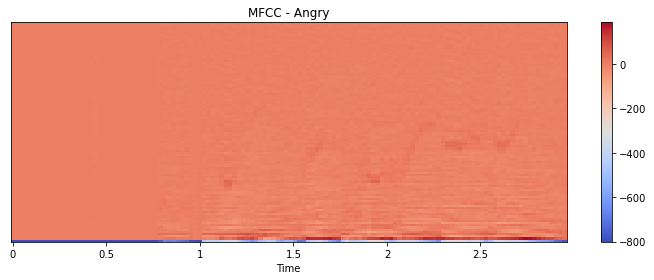

features.shape = torch.Size([100, 128])


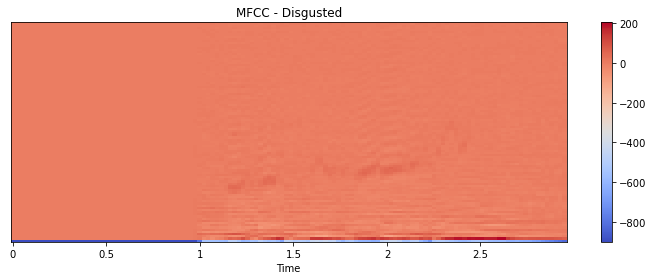

features.shape = torch.Size([100, 128])


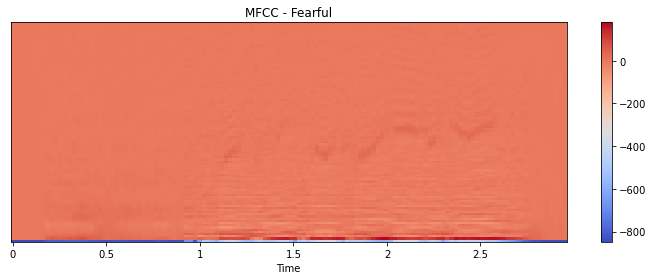

features.shape = torch.Size([100, 128])


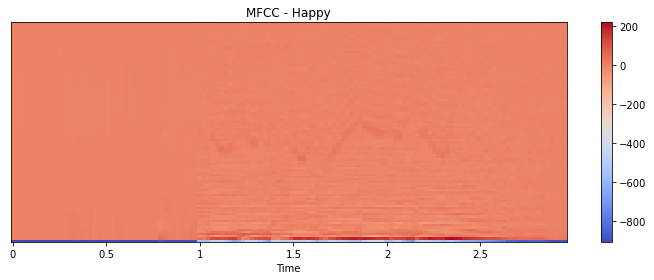

features.shape = torch.Size([100, 128])


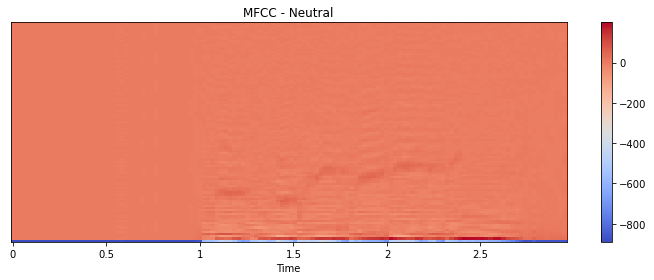

features.shape = torch.Size([100, 128])


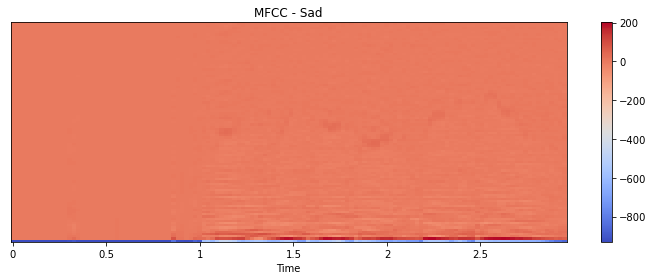

/tmp/ipykernel_2886/2805357323.py:14: UserWarning: PySoundFile failed. Trying audioread instead.
  waveform, sample_rate = librosa.load(file, res_type='kaiser_fast')
/home/ubuntu/.local/lib/python3.10/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'data/audio-emotions/Surprised/03-01-08-01-01-01-01.wav'

In [8]:
# visualize one fetures 2D array using matplotlib
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

# %pip install resampy

def extract_mfcc_features(file: str):
    """
        Loads audio from a given file path and extracts features using the MFCC algorithm.
    """
    
    # NOTE: resample to 16kHz
    waveform, sample_rate = librosa.load(file, res_type='kaiser_fast')
    # mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    
    #? extract features
    features = librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=100, n_fft=1000, hop_length=512)

    features = torch.tensor(features)

    m = nn.ZeroPad2d((0, 128 - features.shape[1]))
    
    features = m(features)[:, :128]

    # trim any excess to (128, 128)
    features = features[:, :128]
    # features = torch.mean(features, axis=1)

    # print(f"{features = }")

    # print(f"{features.shape = }")
    # features = features.unsqueeze(1)
    # print(f"{features.shape = }")
    
    return waveform, features

files = [
      "data/audio-emotions/Angry/03-01-05-01-01-01-01.wav"
    , "data/audio-emotions/Disgusted/03-01-07-01-01-01-02.wav"
    , "data/audio-emotions/Fearful/03-01-06-01-01-01-01.wav"
    , "data/audio-emotions/Happy/03-01-03-01-01-01-01.wav"
    , "data/audio-emotions/Neutral/03-01-01-01-01-01-02.wav"
    , "data/audio-emotions/Sad/03-01-04-01-01-01-01.wav"
    , "data/audio-emotions/Surprised/03-01-08-01-01-01-01.wav"
]

# get one batch of data
for file in files:
    waveform, features = extract_mfcc_features(file)
    print(f"{features.shape = }")
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(features.numpy(), x_axis='time')
    plt.colorbar()
    plt.title(f"MFCC - {file.split('/')[2]}")
    plt.tight_layout()
    plt.show()
# _, x = extract_mfcc_features("data/audio-emotions/Angry/03-01-05-01-01-01-01.wav")
# # x, y = batch
# print(x.shape)
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(x[:10].numpy(), x_axis='time')
# plt.colorbar()
# plt.title('MFCC')
# plt.tight_layout()
# plt.show()
# break

In [ ]:
# m1 = nn.Conv1d(in_channels=1, kernel_size=13, out_channels=7)

m1 = nn.Linear(128, 64)

# f = nn.Flatten(1)
f = nn.Linear(64, 7)

# m2 = nn.ReLU()
m2 = nn.Linear(7, 7)

m3 = nn.Dropout(p=0.2)

m4 = nn.Linear(7, 7)

m5 = nn.Softmax(dim=1)

m6 = nn.Softmax(dim=1)

# weighted average
# w = nn.Parameter(torch.randn(1024, 1))

for batch in train:
    X, y = batch
    # print(f"{X}")
    # print(X[0], "\n", X.shape)
    # X = X.unsqueeze(1)
    print(X[0], "\n", X.shape)

    for i, layer in enumerate([m1, f, m2, m3, m4, m5, m6]):
        X = layer(X)
        print(i, X[0], "\n", X.shape)
    
    # X2 = m1(X)
    # print(X2[0], X2.shape)

    # X3 = m2(X2)

    # print(X3[0], X3.shape)

    # X3 = X3.view(X3.shape[0], X3.shape[1], 1)
    # X4 = c(X3).squeeze()
    # print(X4.shape)

    # X5 = s(X4)
    # print(X5.shape)

    # print(f"{X5}")

    # print(f"{torch.argmax(X5, dim=1)}")
    break

tensor([[-492.5489, -458.7011, -460.5951,  ...,    0.0000,    0.0000,
            0.0000],
        [ 106.6406,  108.9613,  106.0503,  ...,    0.0000,    0.0000,
            0.0000],
        [  63.2952,   61.7661,   62.8510,  ...,    0.0000,    0.0000,
            0.0000],
        ...,
        [  -0.9757,   -2.1246,   -0.6615,  ...,    0.0000,    0.0000,
            0.0000],
        [  -1.6478,   -1.0591,    0.5206,  ...,    0.0000,    0.0000,
            0.0000],
        [   1.8621,    2.2138,    2.4604,  ...,    0.0000,    0.0000,
            0.0000]]) 
 torch.Size([32, 128, 128])
0 tensor([[ 3.8541e+02, -1.2209e+02,  6.1394e+01,  ...,  8.3544e+01,
         -2.0093e+02,  2.2030e+01],
        [-1.0328e+02,  2.8873e+01, -1.2818e+01,  ..., -4.0909e+01,
          6.7227e+01, -5.2677e+00],
        [-4.0618e+01,  1.5083e+01, -1.5550e+01,  ...,  1.4994e+00,
          2.1372e+01,  2.6378e+00],
        ...,
        [ 2.0348e+00,  6.3716e-01, -1.1420e+00,  ..., -6.9296e-01,
         -5.9153e-01

In [ ]:
class Reshape(nn.Module):
    def __init__(self, shape):
        super(Reshape, self).__init__()
        self.shape = shape

    def forward(self, x):
        return x.view((x.shape[0], *self.shape))
    
    def __call__(self, x):
        return self.forward(x)
    
class Squeeze(nn.Module):
    def __init__(self):
        super(Squeeze, self).__init__()

    def forward(self, x):
        return x.squeeze()
    
    def __call__(self, x):
        return self.forward(x)

class Print(nn.Module):
    def __init__(self, name: int=0):
        super(Print, self).__init__()
        self.name = name

    def forward(self, x):
        # print(f"{self.name:2d}: {x.shape}")
        return x
    
    def __call__(self, x):
        return self.forward(x)
    


class SpeechEmotionRecognitionModel(pl.LightningModule):
    def __init__(self, input_size, num_classes, dim_feedforward=2048, dim_model=1024, nhead=8, num_encoder_layers=6, num_decoder_layers=6, lr=0.5, dropout=0.1):
        super(SpeechEmotionRecognitionModel, self).__init__()
        self.lr = lr

        encoder_layers = nn.TransformerEncoderLayer(dim_model, nhead, dim_feedforward, dropout)
        # self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_encoder_layers)
        # self.encoder = nn.Linear(input_size, dim_model)
        # self.decoder = nn.Linear(dim_model, num_classes)

        self.layers = nn.Sequential(
            # nn.Conv1d(in_channels=13, kernel_size=11, out_channels=7),
            nn.Linear(input_size, 64),
            nn.Linear(64, 7),
            nn.Dropout(p=0.1),
            nn.Linear(7, 7),
            nn.ReLU(),
            nn.Linear(7, 7),
            # nn.Softmax(dim=1),
            # nn.Sigmoid(),
            nn.Softmax(dim=1)
        )
        

        # initialize the metrics
        self.loss_function = nn.CrossEntropyLoss()
        self.precision = torchmetrics.Precision(task='multiclass', num_classes=num_classes, average="macro")
        self.recall = torchmetrics.Recall(task='multiclass', num_classes=num_classes, average="macro")
        self.F1 = torchmetrics.F1Score(task='multiclass', num_classes=num_classes, average="macro")

    def forward(self, src):
        output = self.layers(src)
        return output

    def training_step(self, batch, batch_idx):
        src, tgt = batch
        
        # src = src.unsqueeze(1)
        # print(f"{src.shape = }")
        output = self(src)

        # print(f"{output.shape = }")
        # print(f"{tgt.shape = }")
        loss = self.loss_function(output, tgt)
        self.log('cross entropy loss_step', loss, on_step=True, on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        src, tgt = batch
        output = self(src)
        loss = self.loss_function(output, tgt)
        # self.log('cross entropy loss', loss, on_epoch=True, prog_bar=True)
        # print(f"LOSS: {loss}")

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        scheduler = {
            'scheduler': ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True),
            'monitor': 'cross entropy loss_step',  # Name of the metric to monitor
            'interval': 'epoch',
            'frequency': 1,
        }
        super().configure_optimizers()
        return {'optimizer': optimizer, 'lr_scheduler': scheduler}

    # function for evaluating the quality of output and target
    def evaluation(self, output, target, loss):
        # Calculate and log metrics
        # output = output.squeeze()

        precision = self.precision(output, target)
        recall = self.recall(output, target)
        f1 = self.F1(output, target)
        # print('precision:{}'.format(self.precision(output, target)))
        # self.log('recall:{}'.format(self.recall(output, target)))
        # self.log('f1:{}'.format(self.F1(output, target)))

        print(f"CE:        {loss}")
        print(f"PRECISION: {precision}")
        print(f"RECALL:    {recall}")
        print(f"F1:        {f1}")

        # self.log('precision', precision)
        # self.log('recall', recall)
        # self.log('f1', f1)

In [ ]:
model = SpeechEmotionRecognitionModel(input_size=dataset.feature_count, num_classes=dataset.class_count)

for p in model.parameters():
    if p.dim() > 1:
        nn.init.xavier_uniform_(p)
# callbacks=[TQDMProgressBar(refresh_rate=10)]
trainer = pl.Trainer(default_root_dir='checkpoints', accelerator="auto", max_epochs=50, min_epochs=2, log_every_n_steps=1)

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.12.1-git20200711.33e2d80-dfsg1-0.6 is an invalid version and will not be supported in a future release
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [ ]:
for batch in test:
    X, y = batch
    X = X.cuda(0)
    y = y.cuda(0)
    print(f"X: {X.device}")
    print(f"y: {y.device}")
    print(f"model: {model.device}")

    model = model.cuda(0)
    output = model(X)
    # print out put device
    print(f"output: {X.device}")
    model.evaluation(output, y, model.loss_function(output, y))

    # print(f"\n\nACTUAL")
    # print(y)

    # print the predictions
    # print(f"\n\nPredictions: {torch.argmax(output, dim=1)}")
    # # print sums of predictions
    # print(f"Predictions sum: {torch.sum(output, dim=1)}")
    # print(output)

    for i in range(32):
        print(f"{torch.argmax(output[i]):2d} | {torch.argmax(y[i]):2d} >>> {torch.max(output[i]):.2f}\n\t{output[i]}")
    break

X: cuda:0
y: cuda:0
model: cpu
output: cuda:0


RuntimeError: expected scalar type Long but found Float

In [ ]:
torch.set_float32_matmul_precision('medium')
trainer.fit(model, train_dataloaders=train, val_dataloaders=test)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/ubuntu/.local/lib/python3.10/site-packages/pytorch_lightning/core/module.py:1043: `configure_optimizers` must be implemented to be used with the Lightning Trainer

  | Name          | Type                | Params
------------------------------------------------------
0 | layers        | Sequential          | 8.8 K 
1 | loss_function | CrossEntropyLoss    | 0     
2 | precision     | MulticlassPrecision | 0     
3 | recall        | MulticlassRecall    | 0     
4 | F1            | MulticlassF1Score   | 0     
------------------------------------------------------
8.8 K     Trainable params
0         Non-trainable params
8.8 K     Total params
0.035     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/ubuntu/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:492: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 00005: reducing learning rate of group 0 to 5.0000e-02.


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 00011: reducing learning rate of group 0 to 5.0000e-03.


/home/ubuntu/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [ ]:
for batch in test:
    X, y = batch
    X = X.cuda(0)
    y = y.cuda(0)
    print(f"X: {X.device}")
    print(f"y: {y.device}")
    print(f"model: {model.device}")

    model = model.cuda(0)
    output = model(X)
    # print out put device
    print(f"output: {X.device}")
    model.evaluation(output, y, model.loss_function(output, y))

    # print(f"\n\nACTUAL")
    # print(y)

    # print the predictions
    # print(f"\n\nPredictions: {torch.argmax(output, dim=1)}")
    # # print sums of predictions
    # print(f"Predictions sum: {torch.sum(output, dim=1)}")
    # print(output)

    for i in range(32):
        print(f"{torch.argmax(output[i]):2d} | {torch.argmax(y[i]):2d} >>> {torch.max(output[i]):.2f}\n\t{output[i]}")
    break

X: cuda:0
y: cuda:0
model: cuda:0
output: cuda:0
CE:        1.9779222011566162
PRECISION: 0.5260416269302368
RECALL:    0.5260416269302368
F1:        0.5260416269302368
 5 |  4 >>> 1.00
	tensor([0., 0., 0., 0., 0., 1., 0.], device='cuda:0',
       grad_fn=<SelectBackward0>)
 5 |  3 >>> 1.00
	tensor([0., 0., 0., 0., 0., 1., 0.], device='cuda:0',
       grad_fn=<SelectBackward0>)
 5 |  3 >>> 1.00
	tensor([0., 0., 0., 0., 0., 1., 0.], device='cuda:0',
       grad_fn=<SelectBackward0>)
 5 |  4 >>> 1.00
	tensor([0., 0., 0., 0., 0., 1., 0.], device='cuda:0',
       grad_fn=<SelectBackward0>)
 5 |  3 >>> 1.00
	tensor([0., 0., 0., 0., 0., 1., 0.], device='cuda:0',
       grad_fn=<SelectBackward0>)
 5 |  4 >>> 1.00
	tensor([0., 0., 0., 0., 0., 1., 0.], device='cuda:0',
       grad_fn=<SelectBackward0>)
 5 |  4 >>> 1.00
	tensor([0., 0., 0., 0., 0., 1., 0.], device='cuda:0',
       grad_fn=<SelectBackward0>)
 5 |  4 >>> 1.00
	tensor([0., 0., 0., 0., 0., 1., 0.], device='cuda:0',
       grad_fn=<S